In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function # adds compatibility tp python 2 

In [2]:
import xlrd

In [3]:
import csv

<p style="font-size:23px">let's get XLS files on board</p>

In [4]:
#!pip install xlrd

<p style="font-size:23px">nice! now that we got xlrd in the computer, let's never run this line again</p> 

In [5]:
df_alm = pd.read_csv('theAlmonds/ALMONDS-AcreageYieldProductionandPrice-2021-04-04.csv')

# data is sorced from the https://quickstats.nass.usda.gov/

df_alm

,YEAR,LOCATION,STATE ANSI,ASD CODE,COUNTY ANSI,REFERENCE PERIOD,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE
0,1996,CALIFORNIA,6,,,YEAR,ALMONDS,,"428,000",,,
1,1997,CALIFORNIA,6,,,MARKETING YEAR,ALMONDS,,,1.56,,
2,1997,CALIFORNIA,6,,,YEAR,ALMONDS,,,,"1,160,640,000",
3,1998,CALIFORNIA,6,,,MARKETING YEAR,ALMONDS,,,1.41,,
4,1998,CALIFORNIA,6,,,YEAR,ALMONDS,"130,000,000",,,"703,590,000",
...,...,...,...,...,...,...,...,...,...,...,...,...
72,2017,CALIFORNIA,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED","2,270,000,000",,,"5,603,950,000","2,200"
73,2018,CALIFORNIA,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED","2,280,000,000",,,"5,602,500,000",
74,2019,CALIFORNIA,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED","2,550,000,000",,,"6,094,440,000",
75,2018,CALIFORNIA,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED, EDIBLE","2,241,000,000",,,,


In [6]:
df_alm.drop(['LOCATION'],axis=1,inplace=True) # California is already a given

df_alm

,YEAR,STATE ANSI,ASD CODE,COUNTY ANSI,REFERENCE PERIOD,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE
0,1996,6,,,YEAR,ALMONDS,,"428,000",,,
1,1997,6,,,MARKETING YEAR,ALMONDS,,,1.56,,
2,1997,6,,,YEAR,ALMONDS,,,,"1,160,640,000",
3,1998,6,,,MARKETING YEAR,ALMONDS,,,1.41,,
4,1998,6,,,YEAR,ALMONDS,"130,000,000",,,"703,590,000",
...,...,...,...,...,...,...,...,...,...,...,...
72,2017,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED","2,270,000,000",,,"5,603,950,000","2,200"
73,2018,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED","2,280,000,000",,,"5,602,500,000",
74,2019,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED","2,550,000,000",,,"6,094,440,000",
75,2018,6,,,YEAR,"ALMONDS, UTILIZED, SHELLED, EDIBLE","2,241,000,000",,,,


In [7]:
# Let's drop more unnecessary columns

df_alm.drop(['STATE ANSI','ASD CODE','COUNTY ANSI','REFERENCE PERIOD'],axis=1, inplace=True)

df_alm

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE
0,1996,ALMONDS,,"428,000",,,
1,1997,ALMONDS,,,1.56,,
2,1997,ALMONDS,,,,"1,160,640,000",
3,1998,ALMONDS,,,1.41,,
4,1998,ALMONDS,"130,000,000",,,"703,590,000",
...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED","2,270,000,000",,,"5,603,950,000","2,200"
73,2018,"ALMONDS, UTILIZED, SHELLED","2,280,000,000",,,"5,602,500,000",
74,2019,"ALMONDS, UTILIZED, SHELLED","2,550,000,000",,,"6,094,440,000",
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE","2,241,000,000",,,,


<p style="font-size:23px"> let's add a "PRODUCTION in kg" column</p>


In [8]:
df_alm.replace(' ', np.nan, inplace=True)

df_alm

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN
4,1998,ALMONDS,"130,000,000",NaN,NaN,"703,590,000",NaN
...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED","2,270,000,000",NaN,NaN,"5,603,950,000","2,200"
73,2018,"ALMONDS, UTILIZED, SHELLED","2,280,000,000",NaN,NaN,"5,602,500,000",NaN
74,2019,"ALMONDS, UTILIZED, SHELLED","2,550,000,000",NaN,NaN,"6,094,440,000",NaN
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE","2,241,000,000",NaN,NaN,NaN,NaN


In [9]:
# this is to get rid of pesky commas and turn the column objects into floats

df_alm['PRODUCTION in LB'] = df_alm['PRODUCTION in LB'].str.replace(',','').astype(float) 

df_alm

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN
4,1998,ALMONDS,1.300000e+08,NaN,NaN,"703,590,000",NaN
...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED",2.270000e+09,NaN,NaN,"5,603,950,000","2,200"
73,2018,"ALMONDS, UTILIZED, SHELLED",2.280000e+09,NaN,NaN,"5,602,500,000",NaN
74,2019,"ALMONDS, UTILIZED, SHELLED",2.550000e+09,NaN,NaN,"6,094,440,000",NaN
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE",2.241000e+09,NaN,NaN,NaN,NaN


In [10]:

df_alm['PRODUCTION in kg'] = df_alm['PRODUCTION in LB']*0.453592 # 1 lb for every 0.453592 kg

df_alm



,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE,PRODUCTION in kg
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN,NaN
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN,NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN,NaN
4,1998,ALMONDS,1.300000e+08,NaN,NaN,"703,590,000",NaN,5.896696e+07
...,...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED",2.270000e+09,NaN,NaN,"5,603,950,000","2,200",1.029654e+09
73,2018,"ALMONDS, UTILIZED, SHELLED",2.280000e+09,NaN,NaN,"5,602,500,000",NaN,1.034190e+09
74,2019,"ALMONDS, UTILIZED, SHELLED",2.550000e+09,NaN,NaN,"6,094,440,000",NaN,1.156660e+09
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE",2.241000e+09,NaN,NaN,NaN,NaN,1.016500e+09


In [11]:
# let's create a new dataframe to graph from 
alm_ykg = pd.DataFrame()

In [12]:
alm_ykg['year'] = df_alm['YEAR']
alm_ykg['Production in kg'] = df_alm['PRODUCTION in kg']

alm_ykg

,year,Production in kg
0,1996,NaN
1,1997,NaN
2,1997,NaN
3,1998,NaN
4,1998,5.896696e+07
...,...,...
72,2017,1.029654e+09
73,2018,1.034190e+09
74,2019,1.156660e+09
75,2018,1.016500e+09


In [13]:
# let's change years to integers

alm_ykg['year'] = alm_ykg['year'].astype(int)

alm_ykg

,year,Production in kg
0,1996,NaN
1,1997,NaN
2,1997,NaN
3,1998,NaN
4,1998,5.896696e+07
...,...,...
72,2017,1.029654e+09
73,2018,1.034190e+09
74,2019,1.156660e+09
75,2018,1.016500e+09


<p style="font-size:23px"> now we need to get rid of the repeating years</p>

In [14]:
alm_ykg = alm_ykg.drop_duplicates(subset=['year'],keep="last")


<p style="font-size:23px"> let's get the years in order; using .sort_by</p>

In [15]:
alm_ykg = alm_ykg.sort_values(by=['year'], ascending= True)

alm_ykg

,year,Production in kg
51,1996,2.313319e+08
52,1997,NaN
53,1998,2.358678e+08
54,1999,3.778421e+08
55,2000,3.188752e+08
56,2001,3.764814e+08
57,2002,4.944153e+08
58,2003,4.717357e+08
59,2004,4.558600e+08
60,2005,4.150367e+08


<p style="font-size:23px"> let's normalize that 1997 value</p>

In [16]:
alm_ykg = alm_ykg.set_index('year')
alm_ykg

,Production in kg
year,
1996,2.313319e+08
1997,NaN
1998,2.358678e+08
1999,3.778421e+08
2000,3.188752e+08
2001,3.764814e+08
2002,4.944153e+08
2003,4.717357e+08
2004,4.558600e+08


In [17]:
alm_ykg['Production in kg'][1997] = (alm_ykg['Production in kg'][1996]+alm_ykg['Production in kg'][1998])*0.5

alm_ykg


,Production in kg
year,
1996,2.313319e+08
1997,2.335999e+08
1998,2.358678e+08
1999,3.778421e+08
2000,3.188752e+08
2001,3.764814e+08
2002,4.944153e+08
2003,4.717357e+08
2004,4.558600e+08


<p style="font-size:23px">now let's visualize</p>

<AxesSubplot:xlabel='year'>

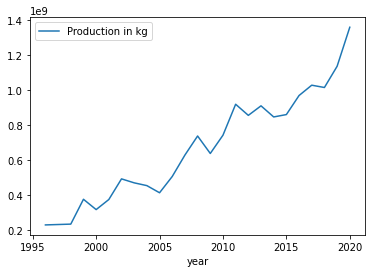

In [18]:
alm_ykg.plot()

In [19]:
mpl.style.use('ggplot') # remember this. It's so cool to use

Text(0.5, 0, 'years')

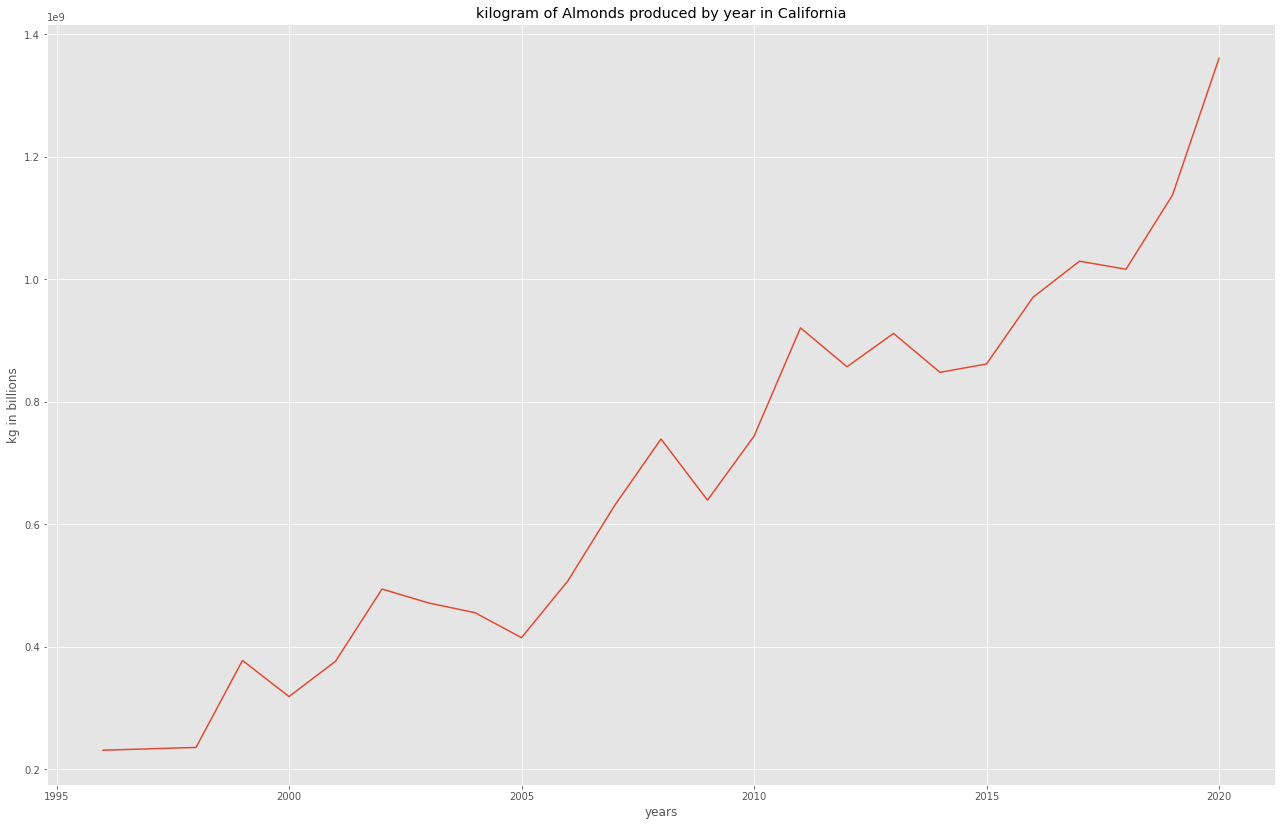

In [20]:
alm_ykg.plot(kind='line',legend =None, figsize=(22,14))


plt.title('kilogram of Almonds produced by year in California')
plt.ylabel('kg in billions')
plt.xlabel('years')


Text(0.5, 0, 'years')

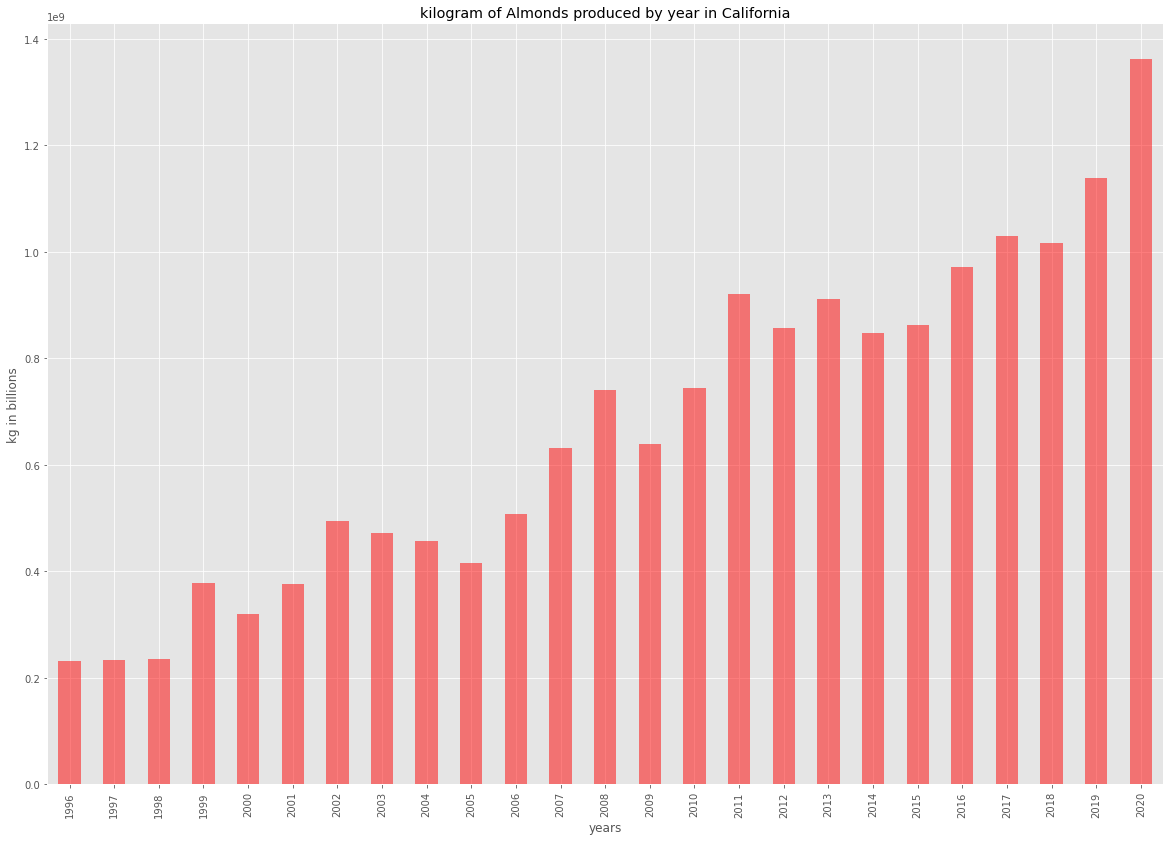

In [31]:
alm_ykg.plot(kind='bar', alpha = .5, color = 'red', legend =None, figsize=(20,14))


plt.title('kilogram of Almonds produced by year in California')
plt.ylabel('kg in billions')
plt.xlabel('years')


Text(0.5, 0, 'years')

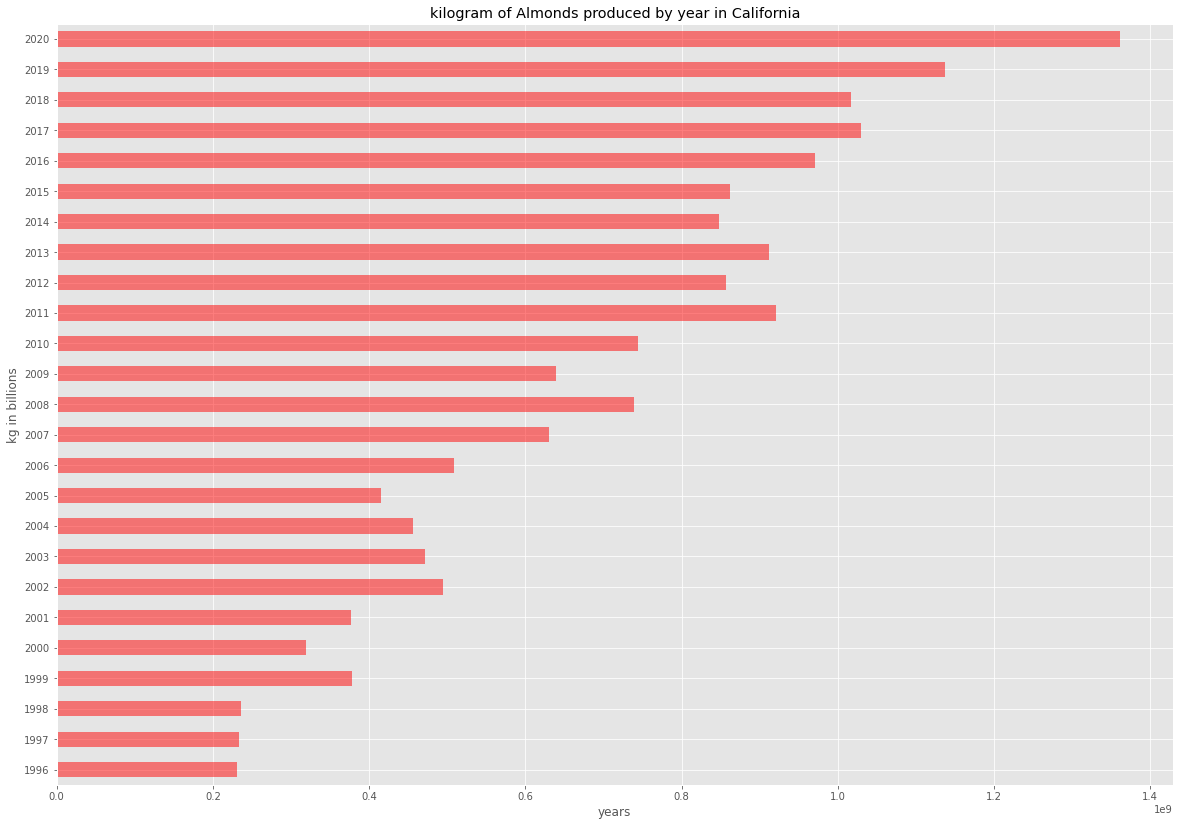

In [32]:
# barh makes the bar graph horizontal

alm_ykg.plot(kind='barh', alpha = .5, color = 'red', legend =None, figsize=(20,14))


plt.title('kilogram of Almonds produced by year in California')
plt.ylabel('kg in billions')
plt.xlabel('years')


Text(0.5, 0, 'years')

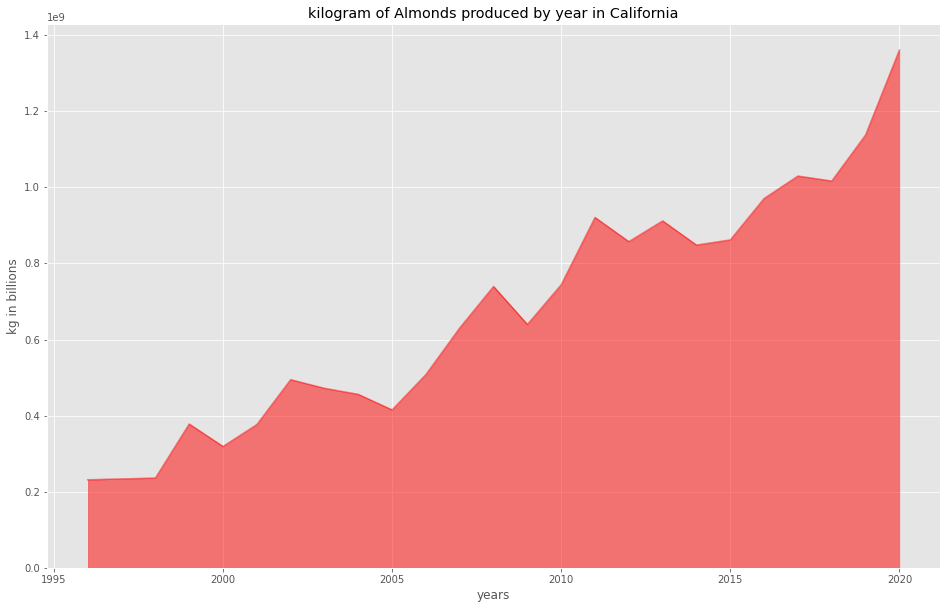

In [22]:
alm_ykg.plot(kind='area', alpha = 0.5, color = 'red', legend =None, figsize=(16,10)) # code #efdecd is almond :)



plt.title('kilogram of Almonds produced by year in California')
plt.ylabel('kg in billions')
plt.xlabel('years')

<p style="font-size:23px"> now let's go sales </p>

In [23]:
df_alm

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE,PRODUCTION in kg
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN,NaN
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN,NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN,NaN
4,1998,ALMONDS,1.300000e+08,NaN,NaN,"703,590,000",NaN,5.896696e+07
...,...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED",2.270000e+09,NaN,NaN,"5,603,950,000","2,200",1.029654e+09
73,2018,"ALMONDS, UTILIZED, SHELLED",2.280000e+09,NaN,NaN,"5,602,500,000",NaN,1.034190e+09
74,2019,"ALMONDS, UTILIZED, SHELLED",2.550000e+09,NaN,NaN,"6,094,440,000",NaN,1.156660e+09
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE",2.241000e+09,NaN,NaN,NaN,NaN,1.016500e+09


In [24]:
df_alm['PRICE RECEIVED in $ / LB'] = df_alm['PRICE RECEIVED in $ / LB'].astype('float')
df_alm

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE,PRODUCTION in kg
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN,NaN
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN,NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN,NaN
4,1998,ALMONDS,1.300000e+08,NaN,NaN,"703,590,000",NaN,5.896696e+07
...,...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED",2.270000e+09,NaN,NaN,"5,603,950,000","2,200",1.029654e+09
73,2018,"ALMONDS, UTILIZED, SHELLED",2.280000e+09,NaN,NaN,"5,602,500,000",NaN,1.034190e+09
74,2019,"ALMONDS, UTILIZED, SHELLED",2.550000e+09,NaN,NaN,"6,094,440,000",NaN,1.156660e+09
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE",2.241000e+09,NaN,NaN,NaN,NaN,1.016500e+09


In [25]:
# create new column for price recieved in kg

df_alm['PRICE RECEIVED in $ / kg'] = df_alm['PRICE RECEIVED in $ / LB'] *0.453592

df_alm.head()

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE,PRODUCTION in kg,PRICE RECEIVED in $ / kg
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN,NaN,0.707604
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN,NaN,NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN,NaN,0.639565
4,1998,ALMONDS,130000000.0,NaN,NaN,"703,590,000",NaN,58966960.0,NaN


In [26]:
# create money generated for the year

df_alm['years sales'] = df_alm['PRODUCTION in kg']*df_alm['PRICE RECEIVED in $ / kg']

df_alm

,YEAR,COMMODITY,PRODUCTION in LB,AREA BEARING in ACRES,PRICE RECEIVED in $ / LB,PRODUCTION in $,YIELD in LB / ACRE,PRODUCTION in kg,PRICE RECEIVED in $ / kg,years sales
0,1996,ALMONDS,NaN,"428,000",NaN,NaN,NaN,NaN,NaN,NaN
1,1997,ALMONDS,NaN,NaN,1.56,NaN,NaN,NaN,0.707604,NaN
2,1997,ALMONDS,NaN,NaN,NaN,"1,160,640,000",NaN,NaN,NaN,NaN
3,1998,ALMONDS,NaN,NaN,1.41,NaN,NaN,NaN,0.639565,NaN
4,1998,ALMONDS,1.300000e+08,NaN,NaN,"703,590,000",NaN,5.896696e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
72,2017,"ALMONDS, UTILIZED, SHELLED",2.270000e+09,NaN,NaN,"5,603,950,000","2,200",1.029654e+09,NaN,NaN
73,2018,"ALMONDS, UTILIZED, SHELLED",2.280000e+09,NaN,NaN,"5,602,500,000",NaN,1.034190e+09,NaN,NaN
74,2019,"ALMONDS, UTILIZED, SHELLED",2.550000e+09,NaN,NaN,"6,094,440,000",NaN,1.156660e+09,NaN,NaN
75,2018,"ALMONDS, UTILIZED, SHELLED, EDIBLE",2.241000e+09,NaN,NaN,NaN,NaN,1.016500e+09,NaN,NaN


In [27]:
df_yys = pd.DataFrame()

df_yys['year'] = df_alm['YEAR']
df_yys['years sales'] = df_alm['years sales']

df_yys

,year,years sales
0,1996,NaN
1,1997,NaN
2,1997,NaN
3,1998,NaN
4,1998,NaN
...,...,...
72,2017,NaN
73,2018,NaN
74,2019,NaN
75,2018,NaN


In [28]:
df_yys.dropna(axis=0)

,year,years sales


In [29]:
#looks like we have no data
